In [1]:
/****************************************************************************
* File name: empirical_exercise3.do
* Author(s): Sze, J.
* Date: 2/21/2019
* Description: 
* Answers to empirical exercise 3 for Labor Economics
*
* Inputs: 
* ..\input_data\Small CPS, 1976-2018.dta" 
* 
* Outputs:
* 
***************************************************************************/

## Empirical Exercise 3
This week’s exercise uses the Small CPS, 1976-2018.dta file, an extract of the basic monthly
CPS files since 1976. The extract contains samples of the civilian, working-age population: everyone
age 16 and older who is not in the military. In addition, the extract randomly draws 1,000
observations per year, so the data set contains 43,000 observations.

In [2]:
use "..\input_data\Small CPS, 1976-2018.dta", clear

(1000 Obs./Year Extract of the Basic Monthly CPS Files, 1976-2018)


## A. Explore the Data. 
Get a sense of the data by (a) describing the data set, (b) listing 5–10
observations (perhaps 8–10 variables at a time) without and with labels, (c) summarizing
the data without and with the weighting variable pweight, and (d) tabulating (without
weights) the categorical variables. Also, compute cross-tabulations of key categorical
variables (e.g., sex, race, empstat, month) by year.

In [3]:
describe


Contains data from ..\input_data\Small CPS, 1976-2018.dta
  obs:        43,000                          1000 Obs./Year Extract of the Basic Monthly CPS Files, 1976-2018
 vars:            18                          22 Jan 2019 18:46
 size:     1,419,000                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
idcode          float   %9.0g               * id code
pweight         double  %12.0g                final

In [4]:
list age female race in 1/5

list age female race in 1/5,nolabel



     +----------------------+
     | age   female    race |
     |----------------------|
  1. |  17      Man   White |
  2. |  54      Man   White |
  3. |  17    Woman   White |
  4. |  75      Man   Black |
  5. |  47      Man   White |
     +----------------------+


     +---------------------+
     | age   female   race |
     |---------------------|
  1. |  17        0      1 |
  2. |  54        0      1 |
  3. |  17        1      1 |
  4. |  75        0      2 |
  5. |  47        0      1 |
     +---------------------+


In [5]:
sum age female hispanic married 


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         age |     43,000    44.29812    18.47795         16         97
      female |     43,000    .5333721    .4988909          0          1
    hispanic |     42,543     .116917    .4123765          0          2
     married |     43,000     .558907    .4965236          0          1


In [6]:
sum age female hispanic married [aweight = pweight]


    Variable |     Obs      Weight        Mean   Std. Dev.       Min        Max
-------------+-----------------------------------------------------------------
         age |  43,000  84456884.1    43.81324   18.39005         16         97
      female |  43,000  84456884.1    .5261701   .4993205          0          1
    hispanic |  42,543  83640801.3    .1522935   .4605924          0          2
     married |  43,000  84456884.1    .5427356   .4981761          0          1


In [7]:
tab1 race region metro


-> tabulation of race  

             race |      Freq.     Percent        Cum.
------------------+-----------------------------------
            White |     36,527       84.95       84.95
            Black |      4,199        9.77       94.71
           Indian |        322        0.75       95.46
Asian/PacIslander |      1,272        2.96       98.42
            Other |        680        1.58      100.00
------------------+-----------------------------------
            Total |     43,000      100.00

-> tabulation of region  

  census division, |
               1-9 |      Freq.     Percent        Cum.
-------------------+-----------------------------------
       New England |      3,835        8.92        8.92
   Middle Atlantic |      5,410       12.58       21.50
East North Central |      5,905       13.73       35.23
West North Central |      4,323       10.05       45.29
    South Atlantic |      7,315       17.01       62.30
East South Central |      2,297        5.34       

In [8]:
tab year female 


    survey |    whether remale
      year |       Man      Woman |     Total
-----------+----------------------+----------
      1976 |       474        526 |     1,000 
      1977 |       457        543 |     1,000 
      1978 |       440        560 |     1,000 
      1979 |       458        542 |     1,000 
      1980 |       441        559 |     1,000 
      1981 |       471        529 |     1,000 
      1982 |       476        524 |     1,000 
      1983 |       461        539 |     1,000 
      1984 |       488        512 |     1,000 
      1985 |       457        543 |     1,000 
      1986 |       480        520 |     1,000 
      1987 |       482        518 |     1,000 
      1988 |       439        561 |     1,000 
      1989 |       444        556 |     1,000 
      1990 |       457        543 |     1,000 
      1991 |       457        543 |     1,000 
      1992 |       484        516 |     1,000 
      1993 |       473        527 |     1,000 
      1994 |       477        

In [9]:
tab year race 


    survey |                          race
      year |     White      Black     Indian  Asian/Pac      Other |     Total
-----------+-------------------------------------------------------+----------
      1976 |       894         93          0          0         13 |     1,000 
      1977 |       877        108          0          0         15 |     1,000 
      1978 |       873         99          0          0         28 |     1,000 
      1979 |       892         86          0          0         22 |     1,000 
      1980 |       880         83          0          0         37 |     1,000 
      1981 |       879         85          0          0         36 |     1,000 
      1982 |       892         74          0          0         34 |     1,000 
      1983 |       886         84          0          0         30 |     1,000 
      1984 |       867        100          0          0         33 |     1,000 
      1985 |       884         89          0          0         27 |     1,000

In [10]:
// It looks like for certain years race categories of indian and asian/pacific inlanders are not represented in the sample. This will lead to strange looking graphs later in part D.

In [11]:
tab year empstat 


    survey |        employment status
      year |  Employed  Unemploye       NILF |     Total
-----------+---------------------------------+----------
      1976 |       549         38        413 |     1,000 
      1977 |       591         37        372 |     1,000 
      1978 |       588         30        382 |     1,000 
      1979 |       585         38        377 |     1,000 
      1980 |       580         38        382 |     1,000 
      1981 |       575         47        378 |     1,000 
      1982 |       553         56        391 |     1,000 
      1983 |       556         63        381 |     1,000 
      1984 |       649         38        313 |     1,000 
      1985 |       581         43        376 |     1,000 
      1986 |       589         44        367 |     1,000 
      1987 |       602         50        348 |     1,000 
      1988 |       625         40        335 |     1,000 
      1989 |       618         31        351 |     1,000 
      1990 |       614         23  

In [12]:
tab class empstat


   employment class: |
      self, private, |        employment status
              public |  Employed  Unemploye       NILF |     Total
---------------------+---------------------------------+----------
       Self Employed |     3,004         73         60 |     3,137 
    Private Employer |    19,063      1,303        593 |    20,959 
          Government |     4,014        139        113 |     4,266 
Unpaid Family Worker |        72          2         19 |        93 
---------------------+---------------------------------+----------
               Total |    26,153      1,517        785 |    28,455 


In [13]:
tab year race


    survey |                          race
      year |     White      Black     Indian  Asian/Pac      Other |     Total
-----------+-------------------------------------------------------+----------
      1976 |       894         93          0          0         13 |     1,000 
      1977 |       877        108          0          0         15 |     1,000 
      1978 |       873         99          0          0         28 |     1,000 
      1979 |       892         86          0          0         22 |     1,000 
      1980 |       880         83          0          0         37 |     1,000 
      1981 |       879         85          0          0         36 |     1,000 
      1982 |       892         74          0          0         34 |     1,000 
      1983 |       886         84          0          0         30 |     1,000 
      1984 |       867        100          0          0         33 |     1,000 
      1985 |       884         89          0          0         27 |     1,000

In [14]:
tab race
tab race, gen(race_)



             race |      Freq.     Percent        Cum.
------------------+-----------------------------------
            White |     36,527       84.95       84.95
            Black |      4,199        9.77       94.71
           Indian |        322        0.75       95.46
Asian/PacIslander |      1,272        2.96       98.42
            Other |        680        1.58      100.00
------------------+-----------------------------------
            Total |     43,000      100.00


             race |      Freq.     Percent        Cum.
------------------+-----------------------------------
            White |     36,527       84.95       84.95
            Black |      4,199        9.77       94.71
           Indian |        322        0.75       95.46
Asian/PacIslander |      1,272        2.96       98.42
            Other |        680        1.58      100.00
------------------+-----------------------------------
            Total |     43,000      100.00


In [15]:
tab hispanic
tab hispanic,nolabel
recode hispanic (2=1)
label define hispanic_ 0 "Not Hispanic" 1 "Hispanic:Mexican/other"
label values hispanic hispanic_



      hispanic |
        origin |      Freq.     Percent        Cum.
---------------+-----------------------------------
  Not Hispanic |     38,990       91.65       91.65
       Mexican |      2,132        5.01       96.66
Other Hispanic |      1,421        3.34      100.00
---------------+-----------------------------------
         Total |     42,543      100.00


   hispanic |
     origin |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |     38,990       91.65       91.65
          1 |      2,132        5.01       96.66
          2 |      1,421        3.34      100.00
------------+-----------------------------------
      Total |     42,543      100.00

(hispanic: 1421 changes made)




In [16]:
tab class empstat,m
codebook class empstat
tab empstat
tab empstat, nolabel



   employment class: |
      self, private, |        employment status
              public |  Employed  Unemploye       NILF |     Total
---------------------+---------------------------------+----------
       Self Employed |     3,004         73         60 |     3,137 
    Private Employer |    19,063      1,303        593 |    20,959 
          Government |     4,014        139        113 |     4,266 
Unpaid Family Worker |        72          2         19 |        93 
                   . |         0        169     14,376 |    14,545 
---------------------+---------------------------------+----------
               Total |    26,153      1,686     15,161 |    43,000 


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
class                                                       

In [17]:
* NILF : not in the labor force 
* the labor force is made up of the employed 
* and the unemployed. The remainder—those who have no job and are not 
* looking for one—are counted as not in the labor force.

In [18]:
gen male = (female == 0)
label variable male "Male = 1"

In [19]:
gen employed = (empstat == 2)
label variable employed "Employed"

In [20]:
gen participation = (empstat == 2 | empstat == 3)
label variable participation "Participation: looking for employment or employed"`'

## B. Examine the Weights. 
The weighting variable pweight applies to all observations in the
basic monthly survey. For a particular worker, what does the value of pweight represent?
Compute and interpret the sum of the weights by year.

In [21]:
sum pweight
// The weights for each observation represents the number of individuals that this observation represent. 


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     pweight |     43,000    1964.114    1096.003    53.1484   12018.34


In [22]:
tab grade


    highest |
      grade |
  completed |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         70        0.16        0.16
          1 |         25        0.06        0.22
        1.4 |        101        0.23        0.46
          2 |         52        0.12        0.58
        2.5 |        192        0.45        1.02
          3 |         85        0.20        1.22
          4 |        116        0.27        1.49
          5 |        140        0.33        1.82
          6 |        282        0.66        2.47
        6.5 |      1,138        2.65        5.12
          7 |        299        0.70        5.81
          8 |        993        2.31        8.12
          9 |      1,435        3.34       11.46
         10 |      2,050        4.77       16.23
         11 |      2,076        4.83       21.06
         12 |     14,835       34.50       55.56
         13 |      6,058       14.09       69.64
         14 |      3,316        7.71    

In [23]:
preserve
collapse (rawsum) pweight, by(year)
list
restore





     +--------------------+
     | year       pweight |
     |--------------------|
  1. | 1976    1665567.96 |
  2. | 1977    1513499.28 |
  3. | 1978    1426584.03 |
  4. | 1979    1488270.75 |
  5. | 1980    1310384.15 |
     |--------------------|
  6. | 1981    1380000.92 |
  7. | 1982    1460993.78 |
  8. | 1983    1491342.41 |
  9. | 1984    1505821.25 |
 10. | 1985    1529755.25 |
     |--------------------|
 11. | 1986    1584462.74 |
 12. | 1987    1658003.86 |
 13. | 1988    1788706.12 |
 14. | 1989     1720098.1 |
 15. | 1990    1691152.65 |
     |--------------------|
 16. | 1991    1703017.38 |
 17. | 1992    1727239.72 |
 18. | 1993    1857285.93 |
 19. | 1994   1827839.478 |
 20. | 1995   1909959.525 |
     |--------------------|
 21. | 1996   2227137.753 |
 22. | 1997   2226302.725 |
 23. | 1998   2207626.277 |
 24. | 1999   2215212.729 |
 25. | 2000   2283764.063 |
     |--------------------|
 26. | 2001    2081102.49 |
 27. | 2002   2014057.725 |
 28. | 2003   20

## C. Collapse the Data to Annual Averages. 
Weight the averages by pweight. Compute the
weighted mean of (a) continuous and binary variables (e.g., age, hours, and female) and
(b) dummy variables that you generate from categorical variables (e.g., black and asian
from race). Your data set of annual averages should also include a weighting variable that
equals the sum of each year’s weights.

In [24]:
global continous_var age 
global binary_var race_* hispanic married veteran 
gen pweight2 = 1

## D. Analyze the Annual Averages. 
Plot:


(a) participation and employment rates since 1976 in one graph and average hours in another graph; 


(b) plot the participation and employment rates by sex in one graph and average hours by sex in another graph; 


(c) plot the employment rate by race in one graph and average hours by race in another graph; and 

(d) plot the employment rate by a schooling variable in one graph and average hours by the
same schooling variable in another graph. The schooling variable classifies workers into
three groups: high school graduate, college graduate, and graduate school; you can drop
observations with grade<12 or 12<grade<16.

In [25]:
// Collapse by year
preserve
collapse (mean) employed participation hours $continous_var $binary_var ///
(rawsum) pweight2 [pweight = pweight] , by(year)

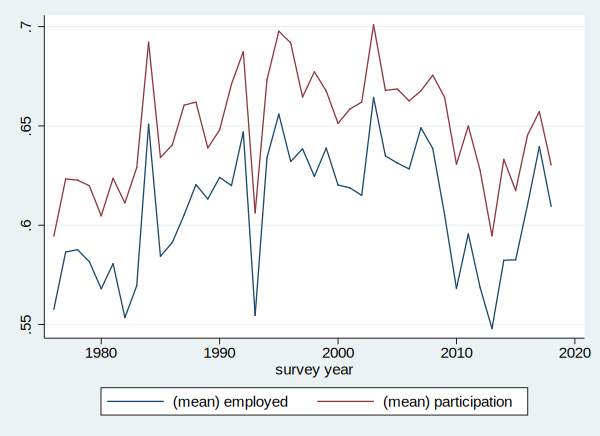





(file ..\outputs\ee3_participation_employment_rates_year.pdf written in PDF format)


In [26]:
twoway line employed year || line participation year
graph export "..\outputs\ee3_participation_employment_rates_year.pdf",as(pdf) replace

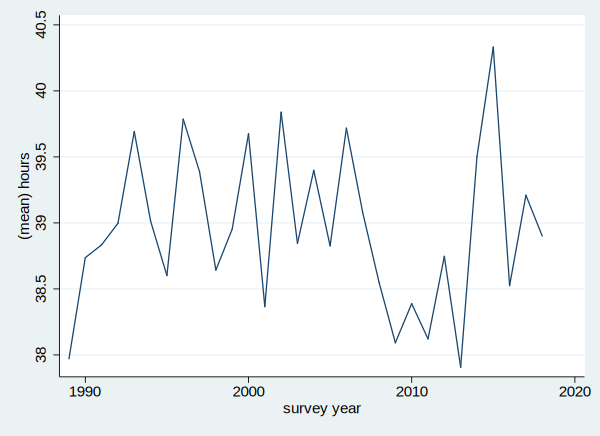





(file ..\outputs\ee3_hours_year.pdf written in PDF format)


In [27]:
line hours year if year > 1988
graph export "..\outputs\ee3_hours_year.pdf",as(pdf) replace
// From 1976 to 1988, hours of work was not recorded

In [28]:
restore

In [29]:
// Collapse by year and gender
preserve
collapse (mean) employed participation hours $continous_var $binary_var ///
(rawsum) pweight2 [pweight = pweight] , by(year female)

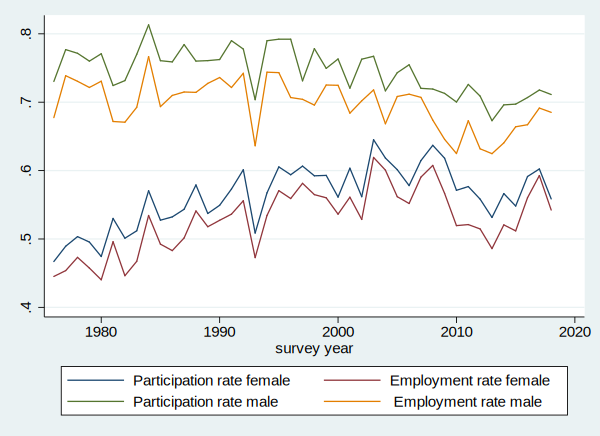





(file ..\outputs\ee3_participation_employment_rates_year_gender.pdf written in PDF format)


In [30]:
twoway line participation employed year if female == 1 || line participation employed year if female == 0, ///
legend(label(1 "Participation rate female") label(2 "Employment rate female") label( 3 "Participation rate male") label( 4 " Employment rate male"))
graph export "..\outputs\ee3_participation_employment_rates_year_gender.pdf",as(pdf) replace

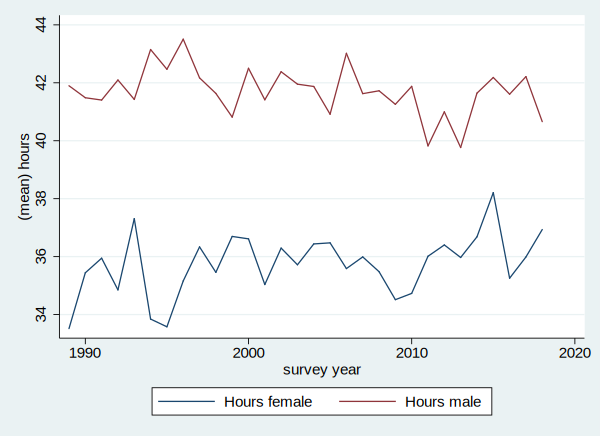





(file ..\outputs\ee3_hours_year_gender.pdf written in PDF format)


In [31]:
twoway line hours year if female == 1 & year >= 1989 || line hours year if female == 0 & year >= 1989, ///
legend(label(1 "Hours female") label(2 "Hours male") )
graph export "..\outputs\ee3_hours_year_gender.pdf",as(pdf) replace

In [32]:
restore

In [33]:
//Collapse by year and race
preserve
collapse (mean) employed participation hours $continous_var $binary_var ///
(rawsum) pweight2 [pweight = pweight] , by(year race)

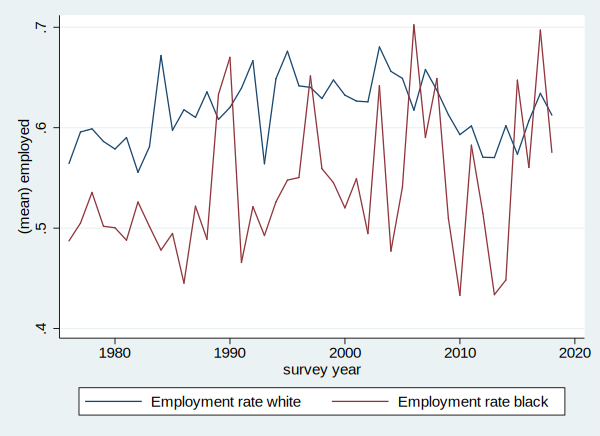





(file ..\outputs\ee3_participation_employment_rates_year_race.pdf written in PDF format)


In [34]:
twoway line employed year if race == 1 || line employed year if race == 2, ///
legend(label(1 "Employment rate white") label(2 "Employment rate black") )
graph export "..\outputs\ee3_participation_employment_rates_year_race.pdf",as(pdf) replace

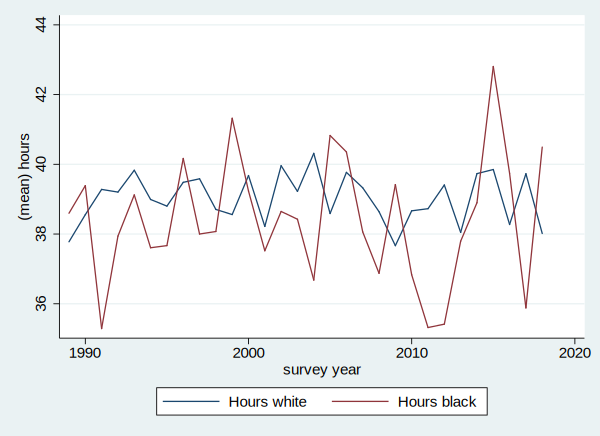





(file ..\outputs\ee3_hours_year_race.pdf written in PDF format)


In [35]:
twoway line hours year if race == 1 & year >= 1989|| line hours year if race == 2 & year >= 1989, ///
legend(label(1 "Hours white") label(2 "Hours black") )
graph export "..\outputs\ee3_hours_year_race.pdf",as(pdf) replace

In [36]:
restore

In [37]:
//Collapse by year and grade
preserve
gen schooling = .
replace schooling = 1 if grade == 12
replace schooling = 2 if (grade >= 13 & grade <= 16)
replace schooling = 3 if grade > 16
label define schooling_ 1 "High school" 2 "College" 3 "Graduate"
label values schooling schooling_
drop if mi(schooling)



(43,000 missing values generated)

(14,835 real changes made)

(15,817 real changes made)

(3,294 real changes made)



(9,054 observations deleted)


In [38]:
collapse (mean) employed participation hours $continous_var $binary_var ///
(rawsum) pweight2 [pweight = pweight] , by(year schooling)

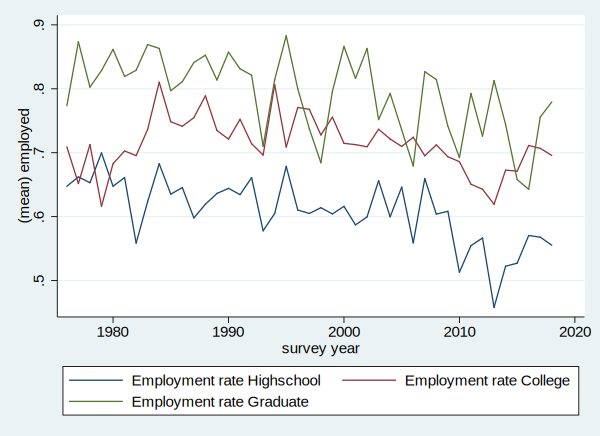





(file ..\outputs\ee3_participation_employment_rates_year_schooling.pdf written in PDF format)


In [39]:
twoway line employed year if schooling == 1 ///
|| line employed year if schooling == 2 ///
|| line employed year if schooling == 3, ///
legend(label(1 "Employment rate Highschool") label(2 "Employment rate College") label(3 "Employment rate Graduate") )
graph export "..\outputs\ee3_participation_employment_rates_year_schooling.pdf",as(pdf) replace

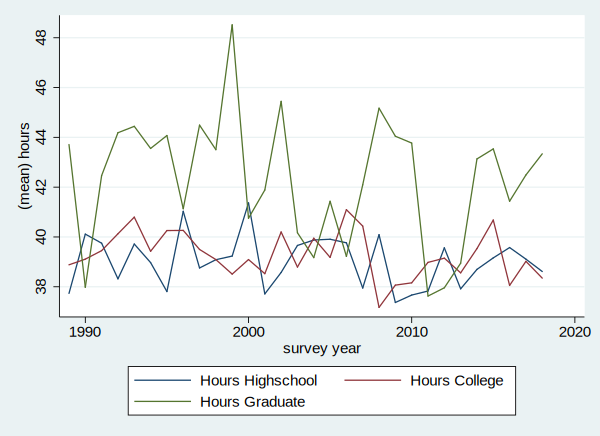





(file ..\outputs\ee3_hours_year_schooling.pdf written in PDF format)


In [40]:
twoway line hours year if schooling == 1 & year >= 1989 ///
|| line hours year if schooling == 2 & year >= 1989 ///
|| line hours year if schooling == 3 & year >= 1989, ///
legend(label(1 "Hours Highschool") label(2 "Hours College") label(3 "Hours Graduate") )
graph export "..\outputs\ee3_hours_year_schooling.pdf",as(pdf) replace

In [41]:
restore